<div style="width: 30%; float: right; margin: 10px; margin-right: 5%;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/FHNW_Logo.svg/2560px-FHNW_Logo.svg.png" width="500" style="float: left; filter: invert(50%);"/>
</div>

<h1 style="text-align: left; margin-top: 10px; float: left; width: 60%;">
    SAN Projekt:<br> Schweizer Offshore Firmen
</h1>

<p style="clear: both; text-align: left;">
    Bearbeitet durch Florin Barbisch, Gabriel Torres Gamez und Tobias Buess im FS 2024.
</p>

Wir führen eine Voranalyse für das Bundesamt für Statistik durch, um die kürzlich aufgetretenen Leaks aus den Offshore Papers zu untersuchen. 

Diese Analyse zielt darauf ab, Umfang und Natur der Verbindungen in Schweizer Offshore-Strukturen zu ermitteln. Wir verwenden dafür Daten aus der [Offshore Leaks Database](https://offshoreleaks.icij.org/), um mögliche Muster, wichtige Personen aufzudecken, die für die Steuerbehörden oder Regulierungsorgane von Interesse sein könnten. 

Unsere Arbeit umfasst eine detaillierte Prüfung der betroffenen Entitäten. Dies wird es dem Bundesamt für Statistik ermöglichen, fundierte Entscheidungen zur weiteren Untersuchung und möglichen Massnahmen zu treffen.

## Overview
In diesem Notebook führen wir alle Ergebnisse unserer einzelnen Analysen zusammen.
Die einzelnen Analysen sind in den Jupyter Notebooks in diesem Repository zu finden.

## 1. Explorative Datenanalyse
Für diese Explorative Datenanalyse nutzen wir einen Subgraph, welcher nur Connected Components beinhaltet, welche mindestens eine Schweizer Adresse beinhalten, da wir sonst sehr viele Connected Components haben und wenige davon für unsere Analyse relevant sind.

### Struktur der Daten
Die ICUJ Datenbank gibt uns bereits eine gute Visualisierung der Datenstruktur. Hier sehen wir die Edges zwischen den 4 wichtigsten Nodetypen (Node mit Typ Others wurden nicht berücksichtigt). Hier wurden jedoch aus Platzgründen nicht alle Kantenverbindungen oder Selfloops dargestellt:

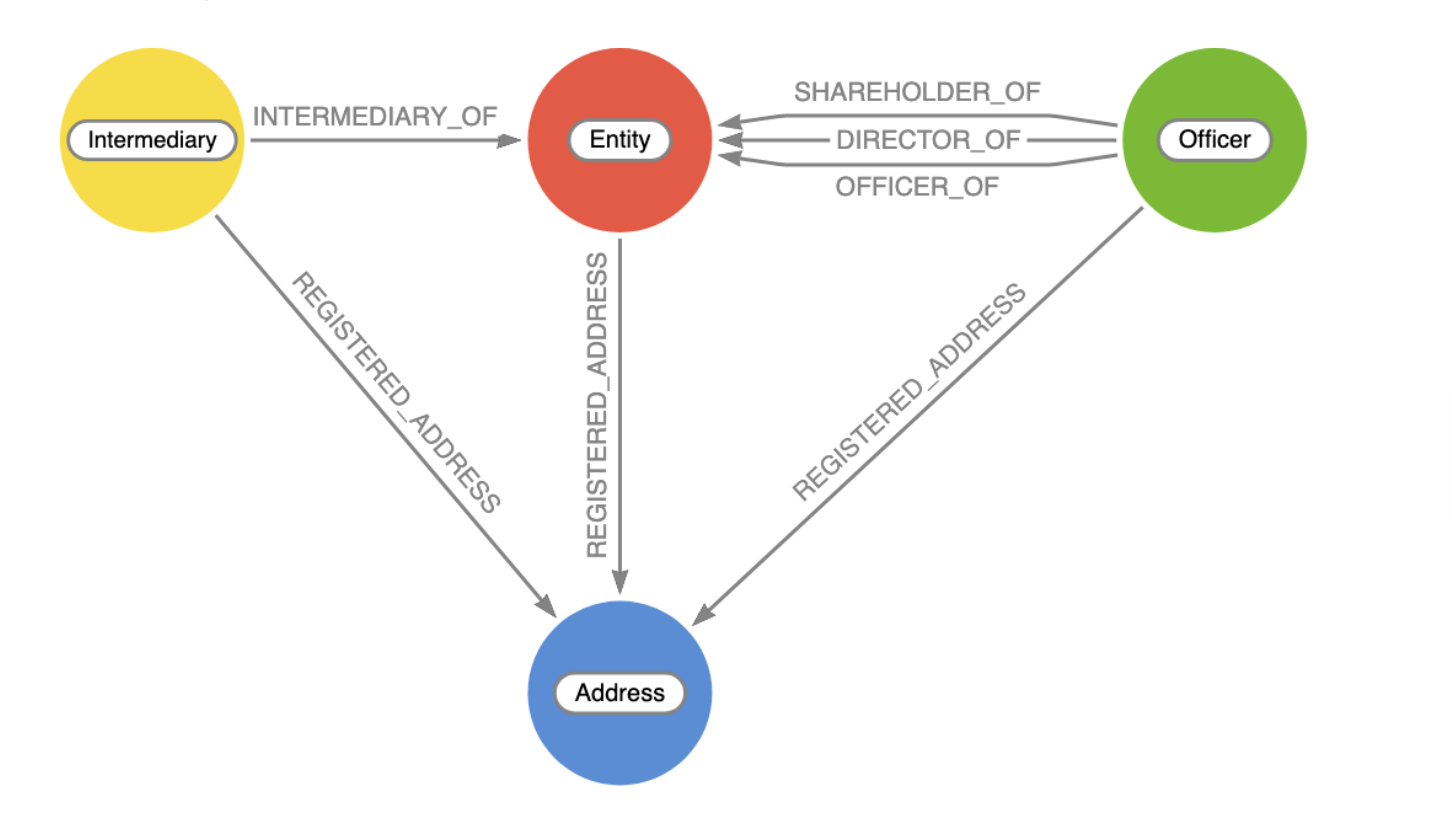

Es gibt einige Edges zwischen Intermediary und Officer, jedoch sind diese eher selten und nicht für unsere Analyse relevant. Die Verbindung zwischen Officer und Intermediary wird stattdessen über die Entity hergestellt.

### Anzahl der Nodes pro Typ

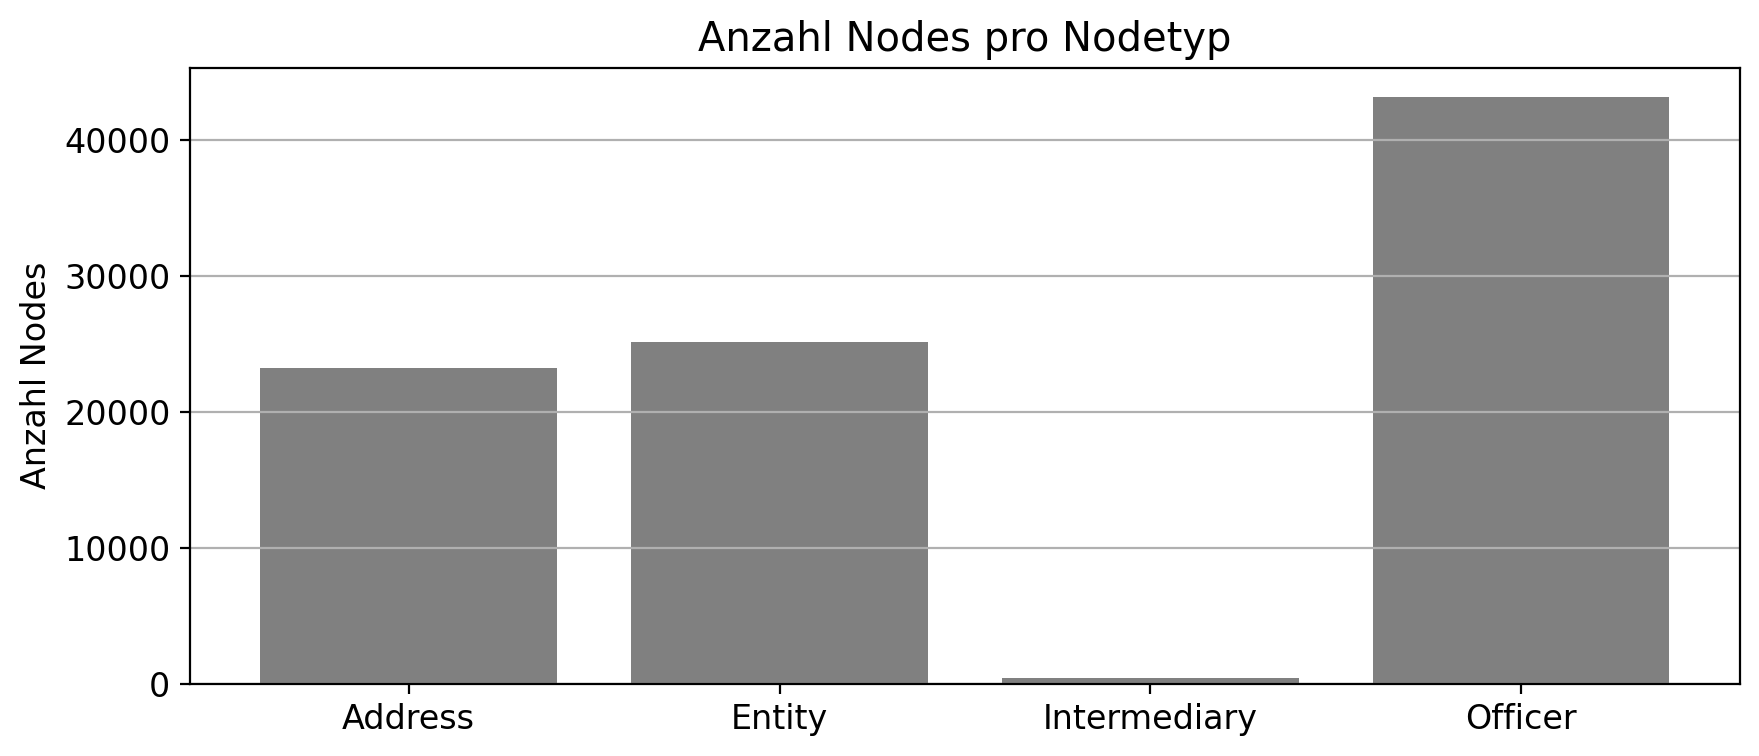

Wir haben Verglichen zu den Officers recht wenig Entitäten. Dies weisst darauf hin, dass es durchschnittlich mehr als ein Officer pro Entität gibt. Es gibt auch sehr weniger Intermediaries als Officers. Es gibt auch recht wenige Addressen, entweder weil einige Officers, Entitäten oder Intermediaries keine Adresse haben oder weil mehrere Nodes die gleiche Adresse haben.

### Grösse der Connected Components

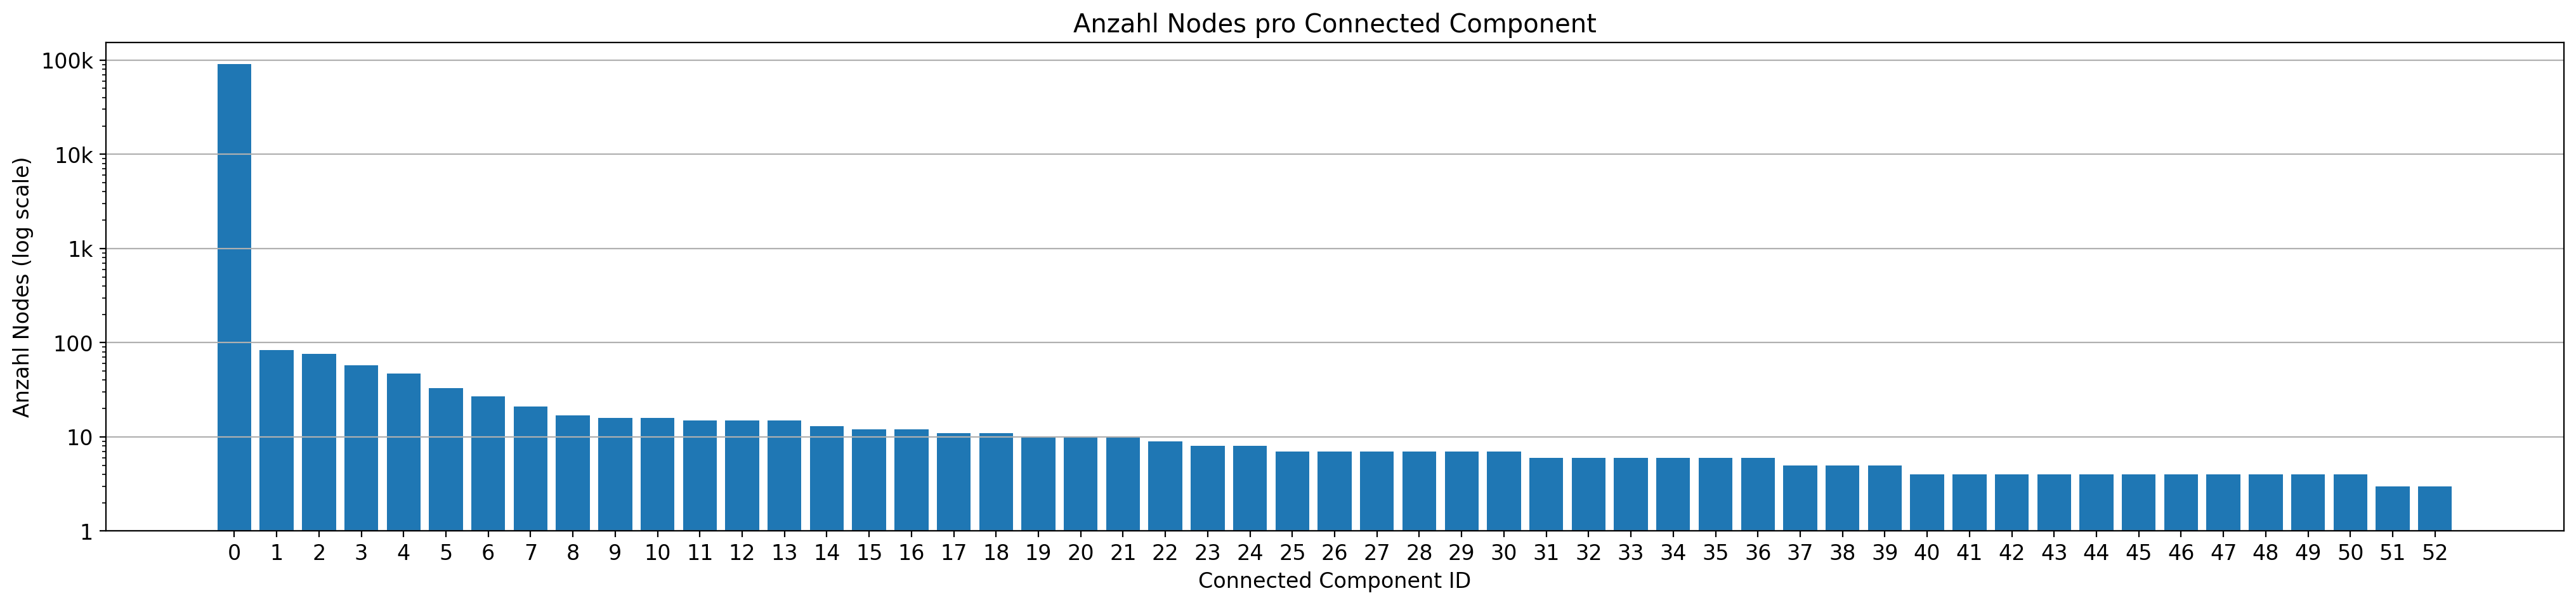

Es existiert ein grosser Component, welcher fast 100'000 Nodes enthält. Der nächstgrösste Component enthält nur etwa 100 Nodes.

### Density

Density (Dichte) misst, wie nah ein Graph einem vollständigen Graphen ist, bei dem alle Knotenpaare verbunden sind. 
Sie wird berechnet als $D = 2E / (N(N-1))$, wobei $E$ die Anzahl der Kanten und $N$ die Anzahl der Knoten ist. 
Eine höhere Dichte zeigt mehr Kanten im Verhältnis zu den Knoten an, was auf ein stark vernetztes Netzwerk hinweist.

Für die Analyse der Density machen wir eine Newman's Weighted Projection auf alle Officers und filtern alle Officers eines Landes heraus und berechnen die Density dieses Subgraphes. Aus Platzgründen wurden nur die Länder mit über 1'000 Officers visualisiert.

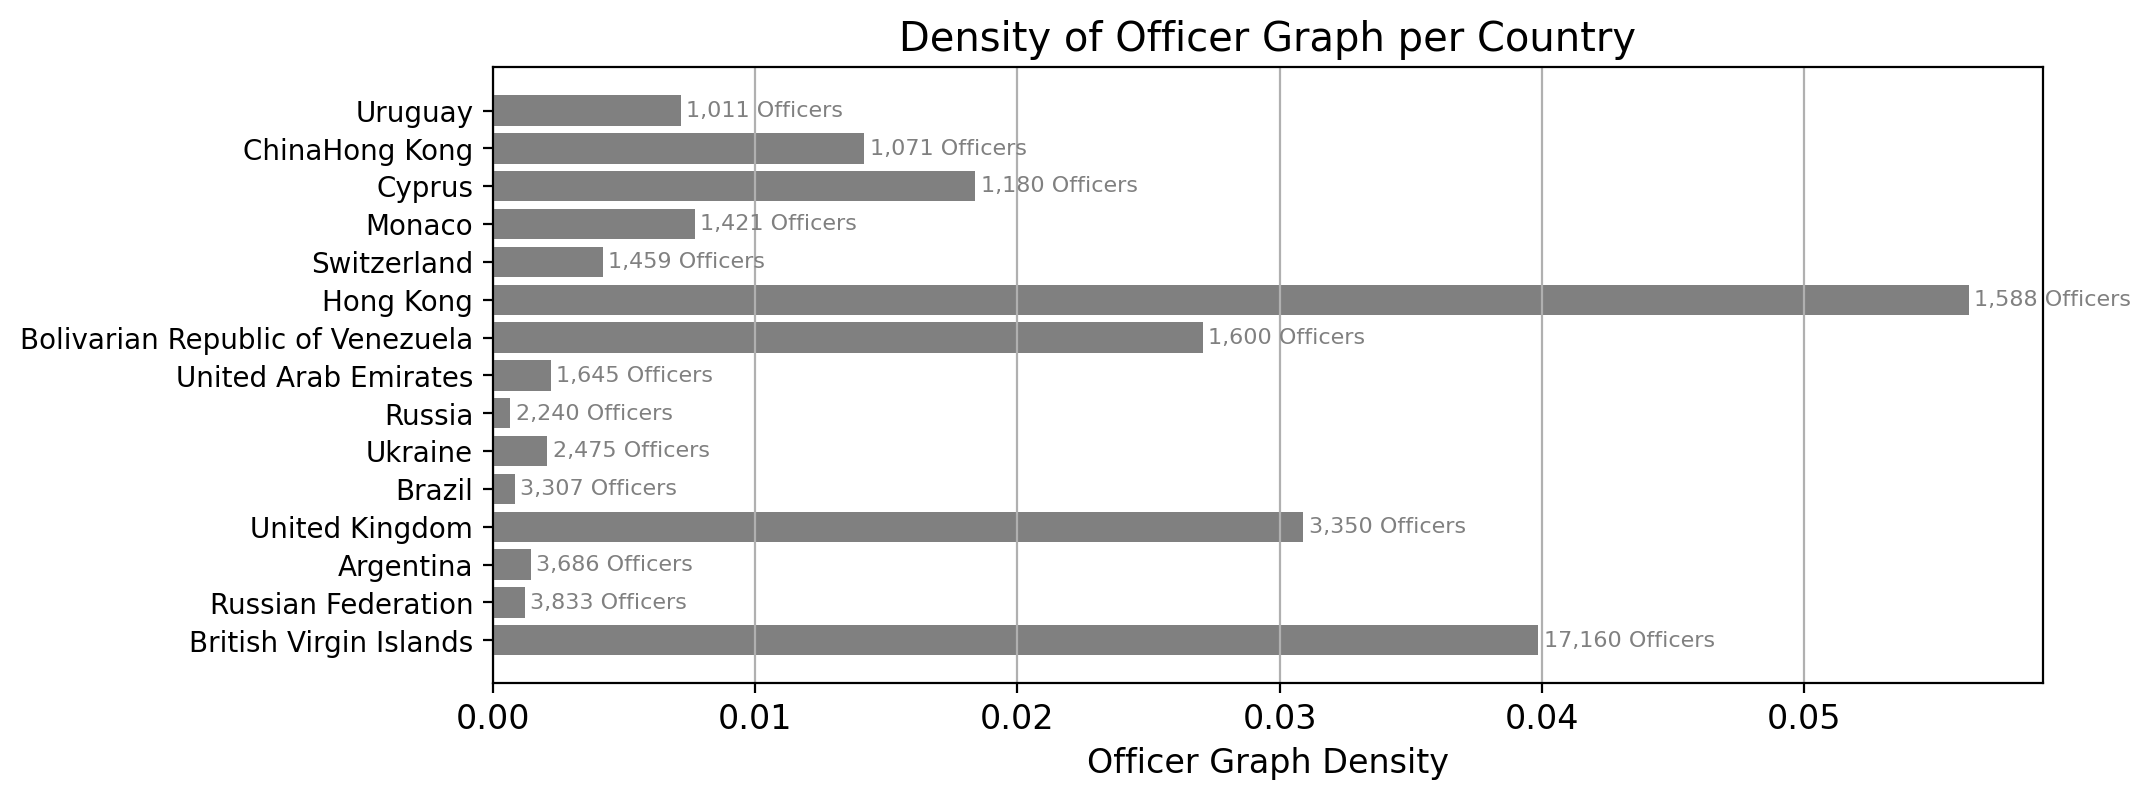

Schweizer Officer scheinen, im Vergleich zu den anderen Ländern mit über 1000 Officers in unserem Datensatz, nicht allzu stark mtieinander vernetzt zu sein.

### Group Centrality

Gruppenzentralität (Group Centrality) misst die Wichtigkeit einer Gruppe von Knoten in einem Netzwerk. Sie bewertet, wie zentral die Gruppe im Gesamtnetzwerk ist, basierend auf verschiedenen Zentralitätsmassen wie Degree, Closeness oder Betweenness. Degree-Zentralität betrachtet die Anzahl der direkten Verbindungen eines Knotens, während Closeness-Zentralität bewertet, wie kurz die durchschnittlichen Distanzen eines Knotens zu allen anderen Knoten sind. Eine hohe Gruppenzentralität zeigt, dass die Knotengruppe eine Schlüsselrolle in der Kommunikation oder im Informationsfluss des Netzwerks spielt.

Für diese Analyse erstellen wir pro Land eine Global View, bei welcher alle Nodes dieses Landes zu einer Node zusammengefasst werden. Darauf berechnen wir die Degree Centrality und die Closeness Centrality.

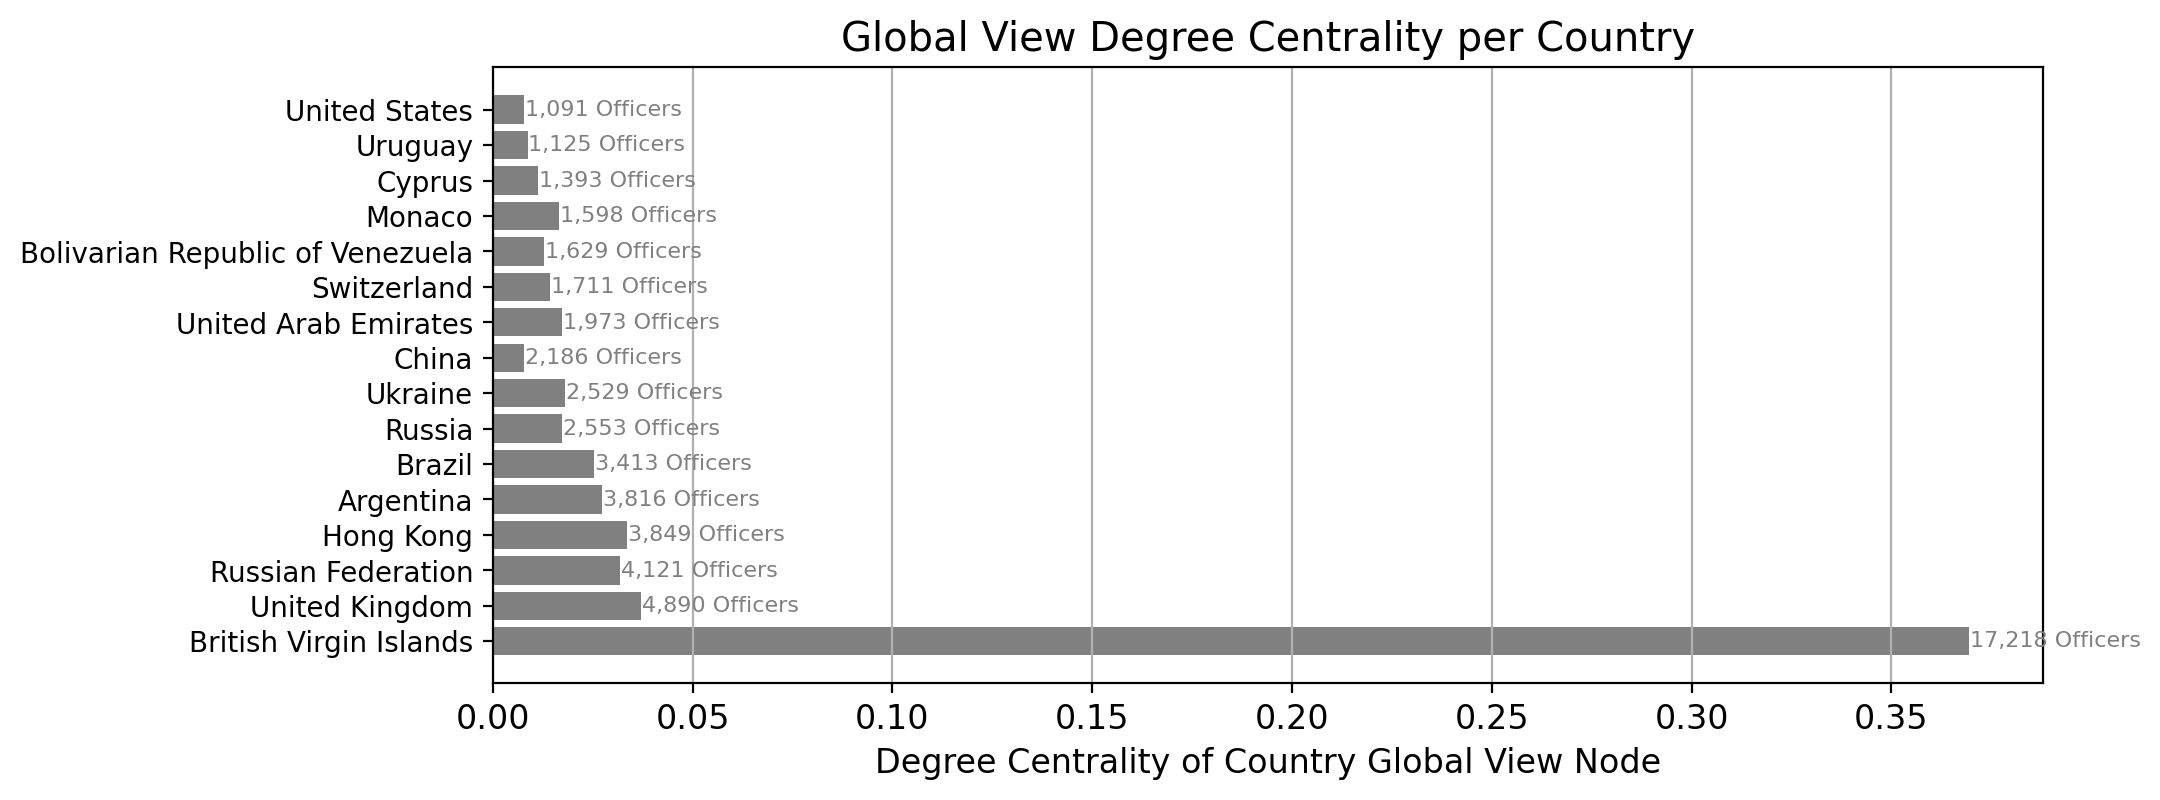

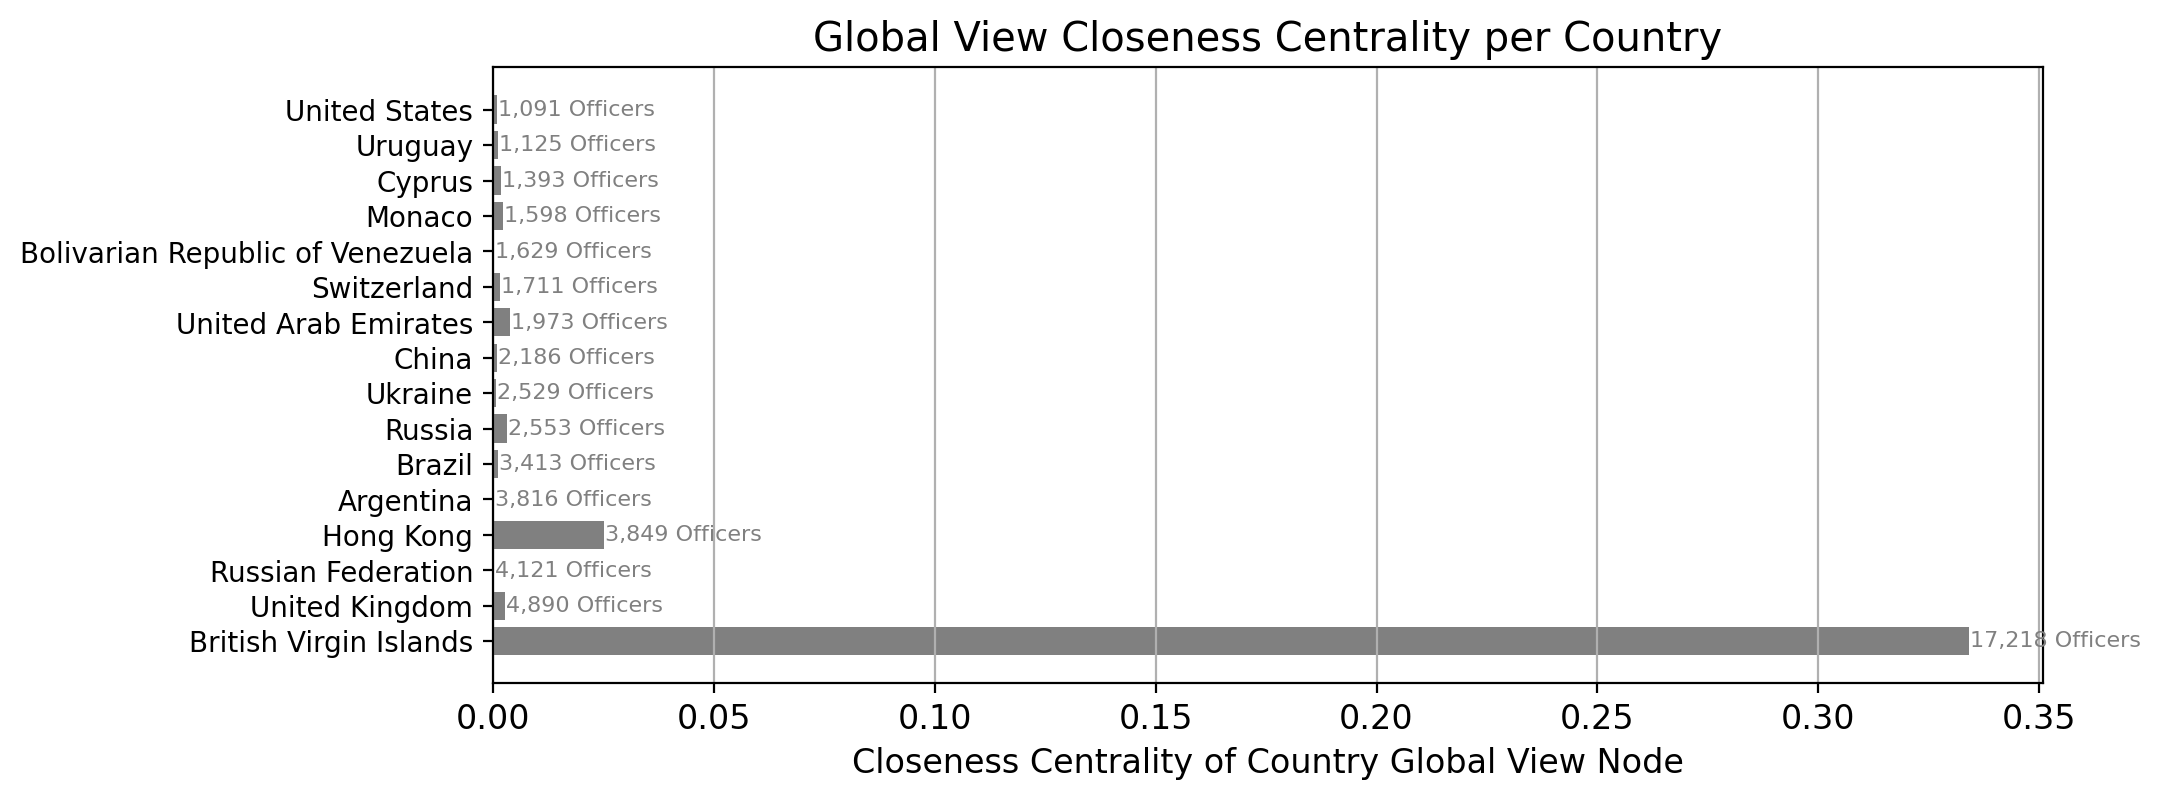

Hier scheinen die Schweiz Officers im Vergleich zu den anderen Ländern nicht besonders Zentral zu sein. Besonders die British Virgin Islands scheinen im Vergleich zu den anderen Ländern sehr zentral zu sein.

## 2. TODO: FLORIN

## 3. Wie intensiv ist die Zusammenarbeit zwischen den Officers verschiedener Länder? Wie gut schneidet die Schweiz dabei ab?

Für diese Analyse werden alle Nodes ausser Officers und Entities herausgefiltert und mit einer Newman's Weighted Projection auf die Officers projiziert. Danach werden alle Officers eines Landes zu einer Global View zusammengefasst und die Interaktionsstärke (Edge Weights) zwischen den Ländern addiert. 

### Interaktionsstärke zwischen den Ländern
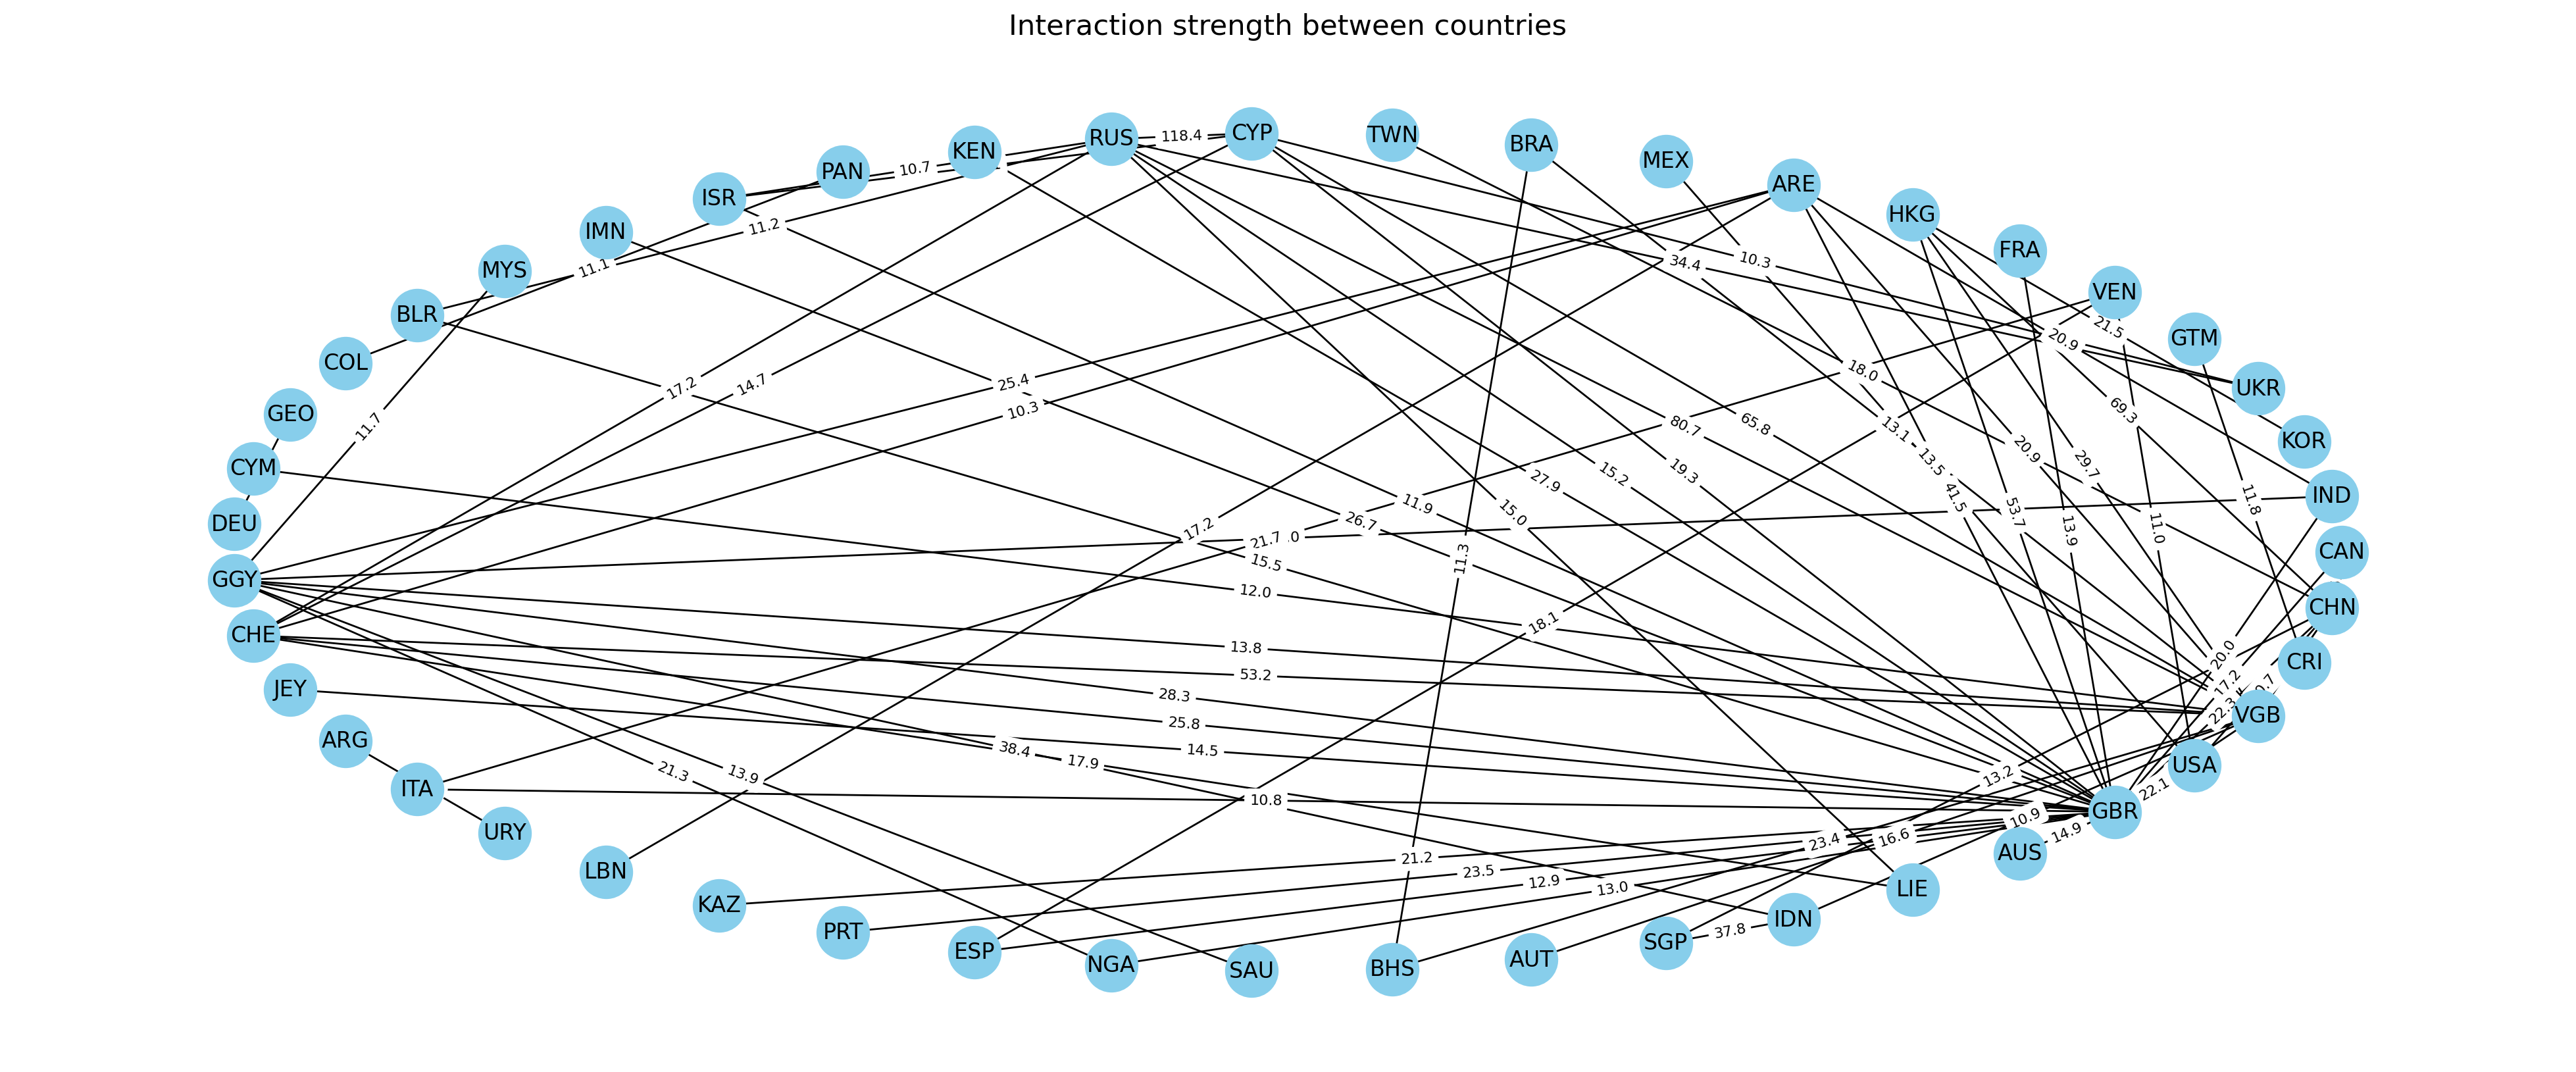

Visualisieren wir nun alle Nodes und Edges mit einem Edge Weight > 10, so ist gut ersichtlich, dass viele Verbindungen von England (GBR) aus gehen. Auch interessant sind Russlands Verbindungen mit der Ukraine, Belarus und Israel.  

Betrachten wir die Schweiz, so sind Verbindungen zwischen den Vereinigten Arabischen Emiraten, Zypern, Virgin Islands (British), Litauen und Russland ersichtlich.

### Hypothesentest

Um zu bestimmen ob die Interaktionsstärke der Schweiz mit den anderen Ländern statistisch signifikant ist, führen wir einen Hypothesentest durch:

- Im Hypothesentest wird überprüft, ob der Rang der Schweiz bezüglich Interaktionsstärke mit den anderen Ländern statistisch signifikant ist (Irrtumswahrscheinlichkeit = 0.05).
- Auch die Interaktionsstärke selbst wird auf statistische Signifikanz überprüft.

Der Hypothesentest wird durch einen Permutationstest durchgeführt.  
Die gesamte Interaktionsstärke mit dem Ausland wird durch den Weighted Node Degree berechnet.  
Anschliessend werden die Kantengewiche des Netzwerks zufällig vertauscht und die Interaktionsstärke und Rang der Schweiz neu berechnet.
Diese Permutation wird 20'000 mal durchgeführt um die Verteilung der Interaktuonsstärke zu simulieren.

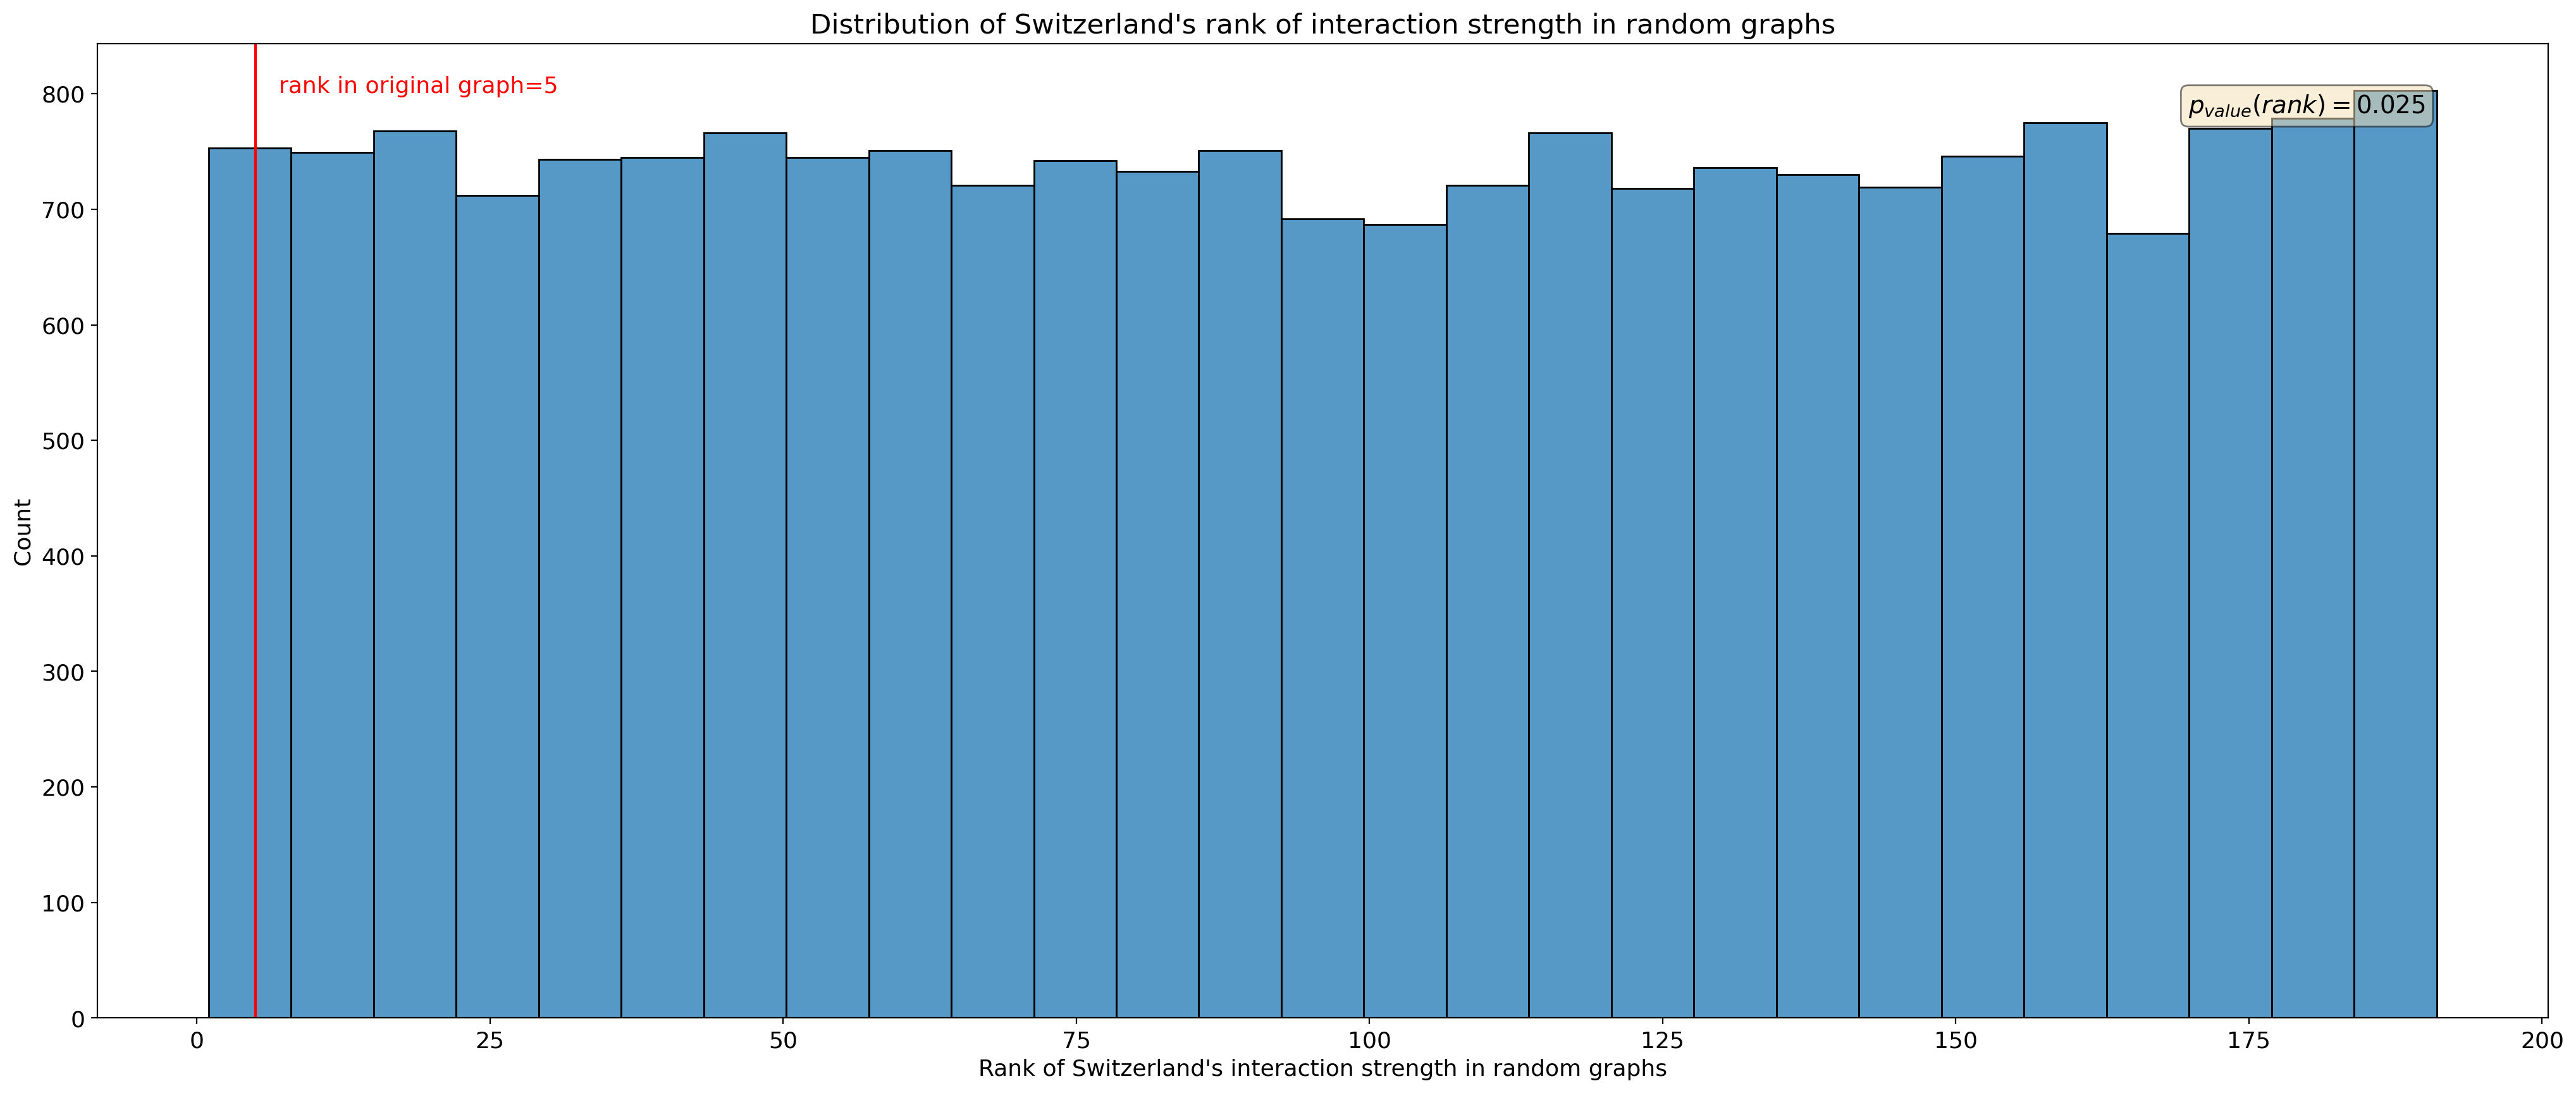

Im obigen Plot sind die Ränge der Interaktionsstärke der Schweiz in zufälligen Graphen als Histogramm visualisiert. Die zufälligen Graphen wurden durch einen Permutationstest mit 20.000 Durchläufen erstellt. Nach jedem Durchlauf wurde der Rang der Schweiz neu berechnet. Dadurch kann der Rang der Schweiz in zufälligen Graphen simuliert werden und herausgefunden werden, in wie vielen Fällen der zufällige Rang kleiner oder gleich dem Rang im ursprünglichen Graphen ist. Dieses Histogramm zeigt die Verteilung des Ranges der Schweiz in zufälligen Graphen. Die rote Linie repräsentiert den Rang im ursprünglichen Graphen. Je weniger blaue Fläche sich links von der Linie befindet, desto kleiner ist der p-Wert und somit auch die Irrtumswahrscheinlichkeit.

Mit einem p-Wert von weniger als 0,05 ist der ursprüngliche Rang von 5 statistisch signifikant.

$$
\begin{align*}
H_0 &: r \geq r_{\text{zufällig}} \\
H_1 &: r < r_{\text{zufällig}}
\end{align*}
$$

Somit kann behaupten werden, dass die Schweiz zu den Spitzenreitern bezüglich der Interaktionsstärke mit anderen Ländern gehört.

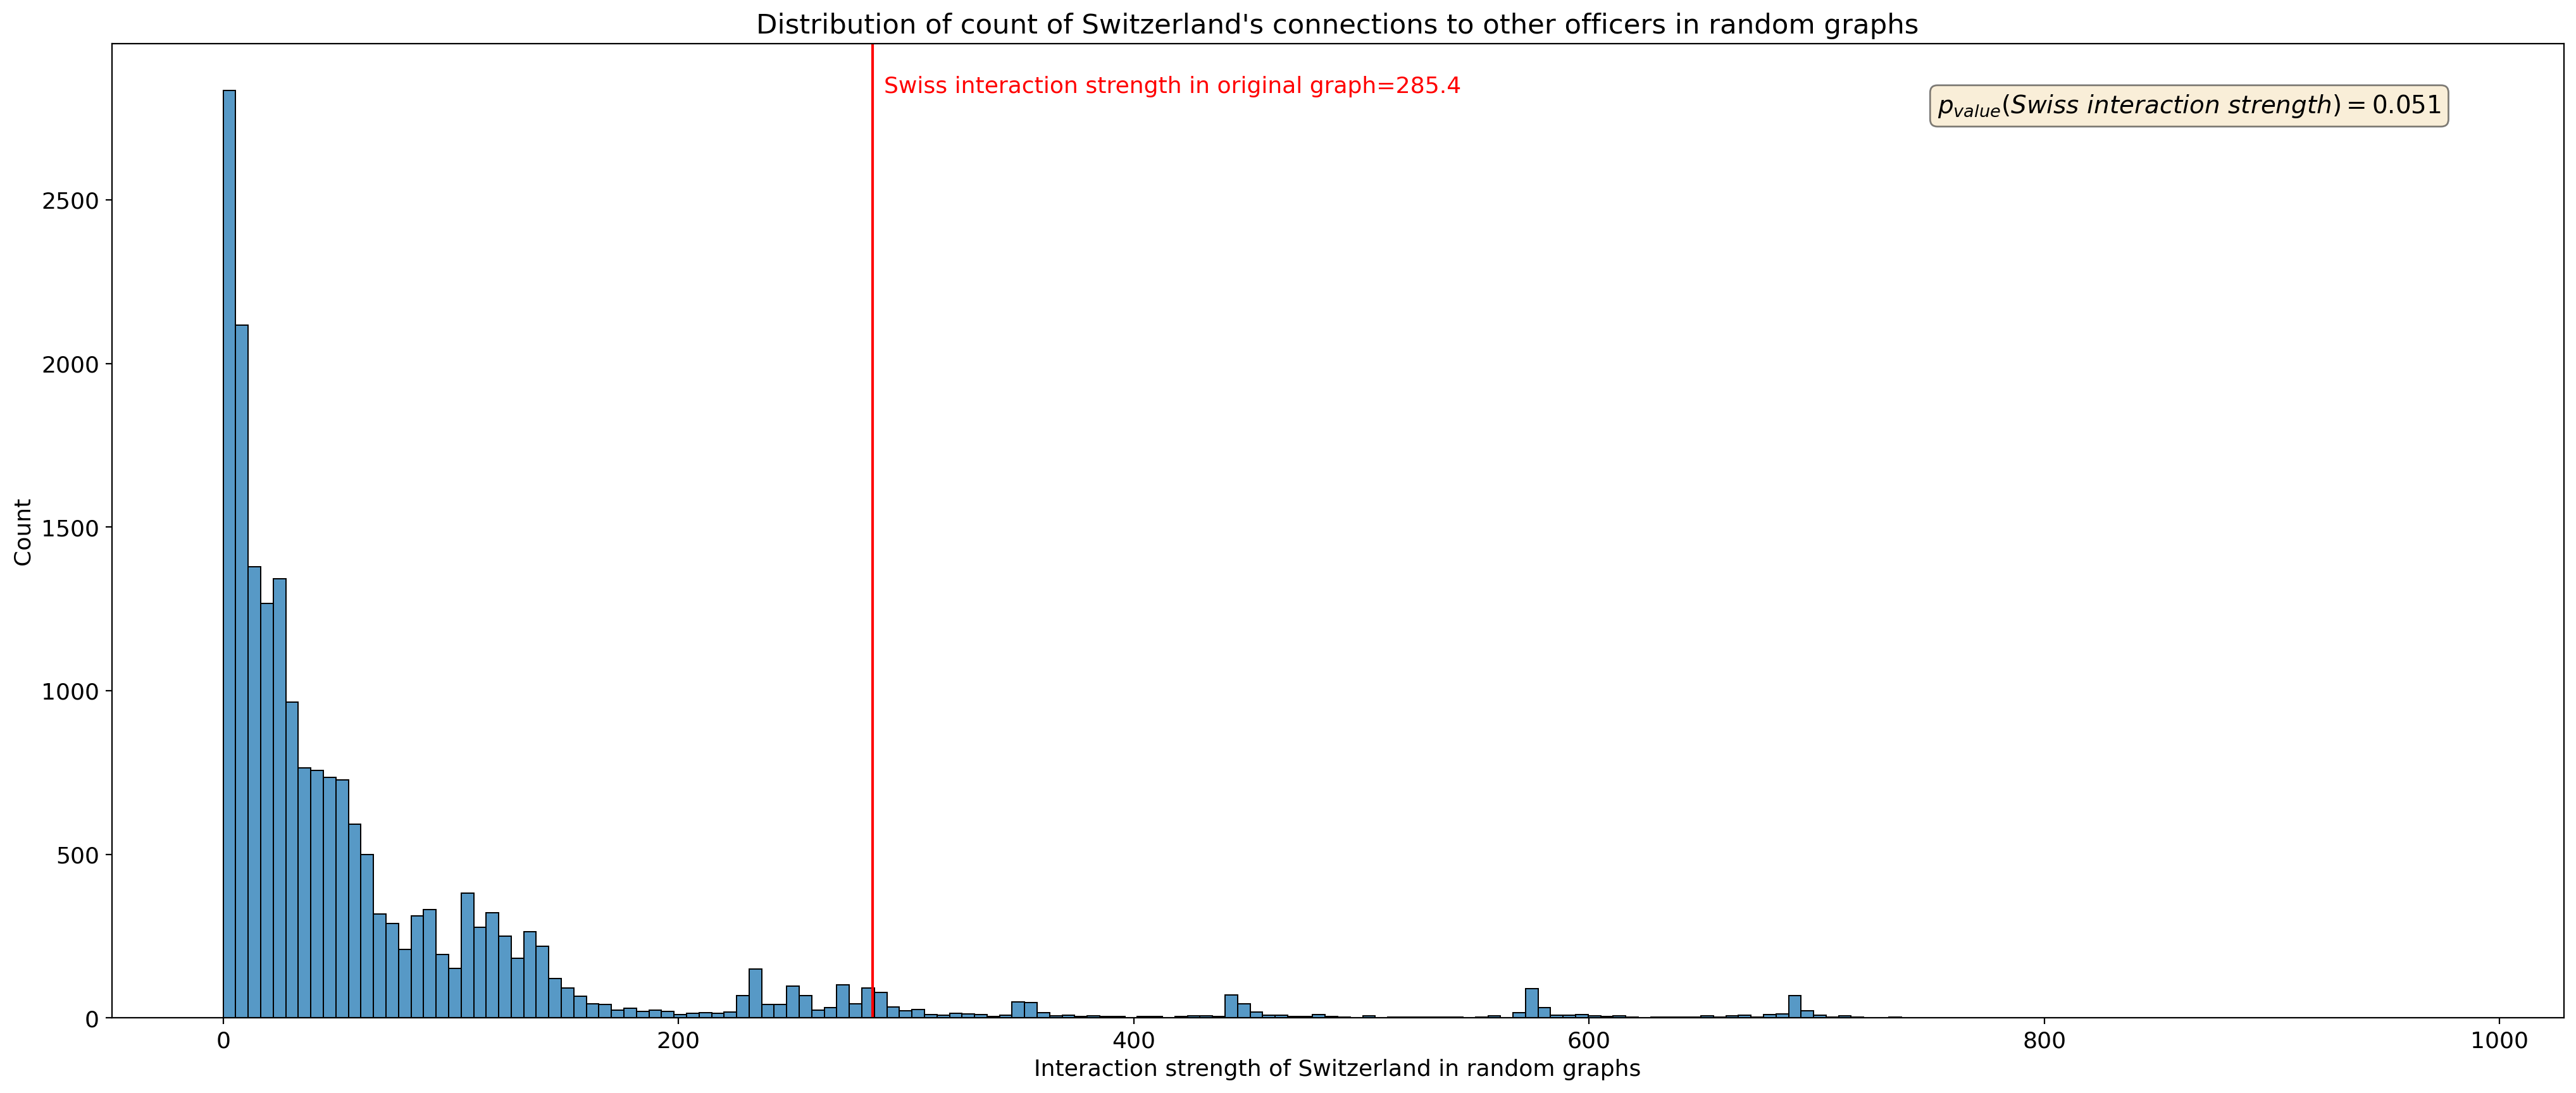

Im obigen Plot ist die Verteilung der Interaktionsstärke (Edge Weight) der Schweiz in zufälligen Graphen als Histogramm dargestellt. Diese zufälligen Graphen wurden ebenfalls durch einen Permutationstest mit 20.000 Durchläufen erstellt. Die rote Linie repräsentiert die Interaktionsstärke der Schweiz im ursprünglichen Graphen. Je weniger blaue Fläche sich rechts von der roten Linie befindet, desto besser, da dies einen kleineren p-Wert und somit eine geringere Irrtumswahrscheinlichkeit bedeutet.

Bei Betrachtung der Interaktionsstärke selbst liegt der p-Wert nahe an der Grenze zur statistischen Signifikanz. Dass der Rang statistisch signifikant ist, ist möglich, weil beim Rang die tatsächliche Interaktionsstärke der einzelnen Ländern nicht berücksichtigt wird.

$$
\begin{align*}
H_0 &: \text{Interaktionsstärke} \leq \text{Interaktionsstärke}_{\text{zufällig}} \\
H_1 &: \text{Interaktionsstärke} > \text{Interaktionsstärke}_{\text{zufällig}}
\end{align*}
$$

Dies zeigt, dass die Schweiz in Bezug auf die Interaktionsstärke eine herausragende Position einnimmt, obwohl die Signifikanzgrenze knapp ist.


## 4. Welche Schweizer Officers haben die meisten Offshore Firmen? 
Für diese Analyse nehmen wir wieder den Subgraphen mit den Connected Components, welche mindestens eine Schweizer Adresse beinhalten. Wir mergen auch Nodes, welche identische Attribute beinhalten und suchen die Officers, mit der höchsten Anzahl Verbindungen an Offshore Firmen (Entity Out-Degree).

### Ruslan Goryukhin Ego Graph

Ruslan Goryukhin hat ein Entity Out-Degree von 28. Er hat somit Verbindungen zu den meisten Offshore Firmen. Er ist vorallem bei vielen Offshore Firmen als "Ultimate Beneficial Owner" eingetragen. Ruslan Goryukhin ist ein russischer Unternehmer, welcher zum Zeitpunkt der Pandora Papers Leaks in der Schweiz wohnhaft war. Nach folgender [Quelle](https://www.reporter.lu/pandora-papers-russische-versteckspiele-via-luxemburg/) ist er "[...] ein enger Geschäftspartner von Arkadij Rotenberg, der wiederum ein Vertrauter von Wladimir Putin ist". Falls er noch in der Schweiz wohnhaft ist, könnte dies für die Schweizer Behörden von Interesse sein, vorallem wegen den aktuellen Sanktionen gegen Russland wegen des Ukraine-Konflikts.

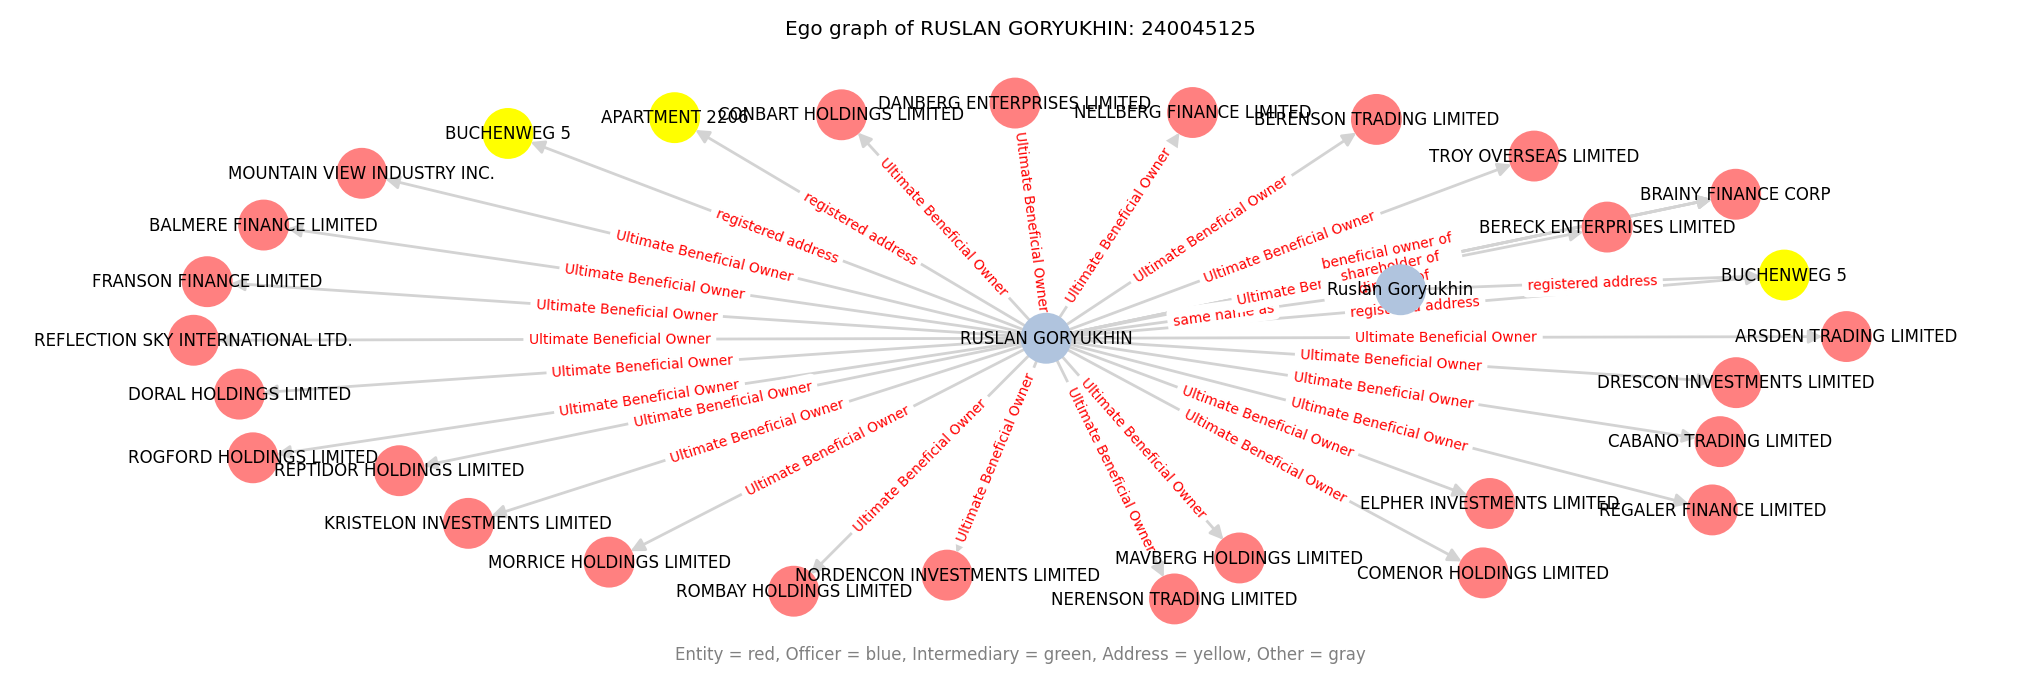

### Adrian Guldener Ego Graph

Adrian Guldener hat einen Entity Out-Degree von 27, nicht weit von Goryukhins 28 entfernt. Adrian Guldener ist ein Schweizer Staatsbürger, wohnhaft in Zug. Er ist bei weniger Entitäten beteiligt, jedoch hat er mehr Verbindungen zu diesen Entitäten. Er ist vorallem bei vielen Offshore Firmen als "Shareholder" und "Beneficial Owner" eingetragen. Adrian Guldener ist CEO der Wealth Management Firma [Marcuard Heritage](https://marcuardheritage.com/who-we-are/board-of-directors/) und war von [2001 bis 2003 Executive Director of UBS Private Banking Eastern Europe in Zürich.](https://marcuardheritage.com/app/uploads/2020/07/MH_Kurz-CV_Adrian.pdf)

Nach einer Google Suche scheint es so, als wäre Adrian Guldener nicht in konkrete Skandale verwickelt.

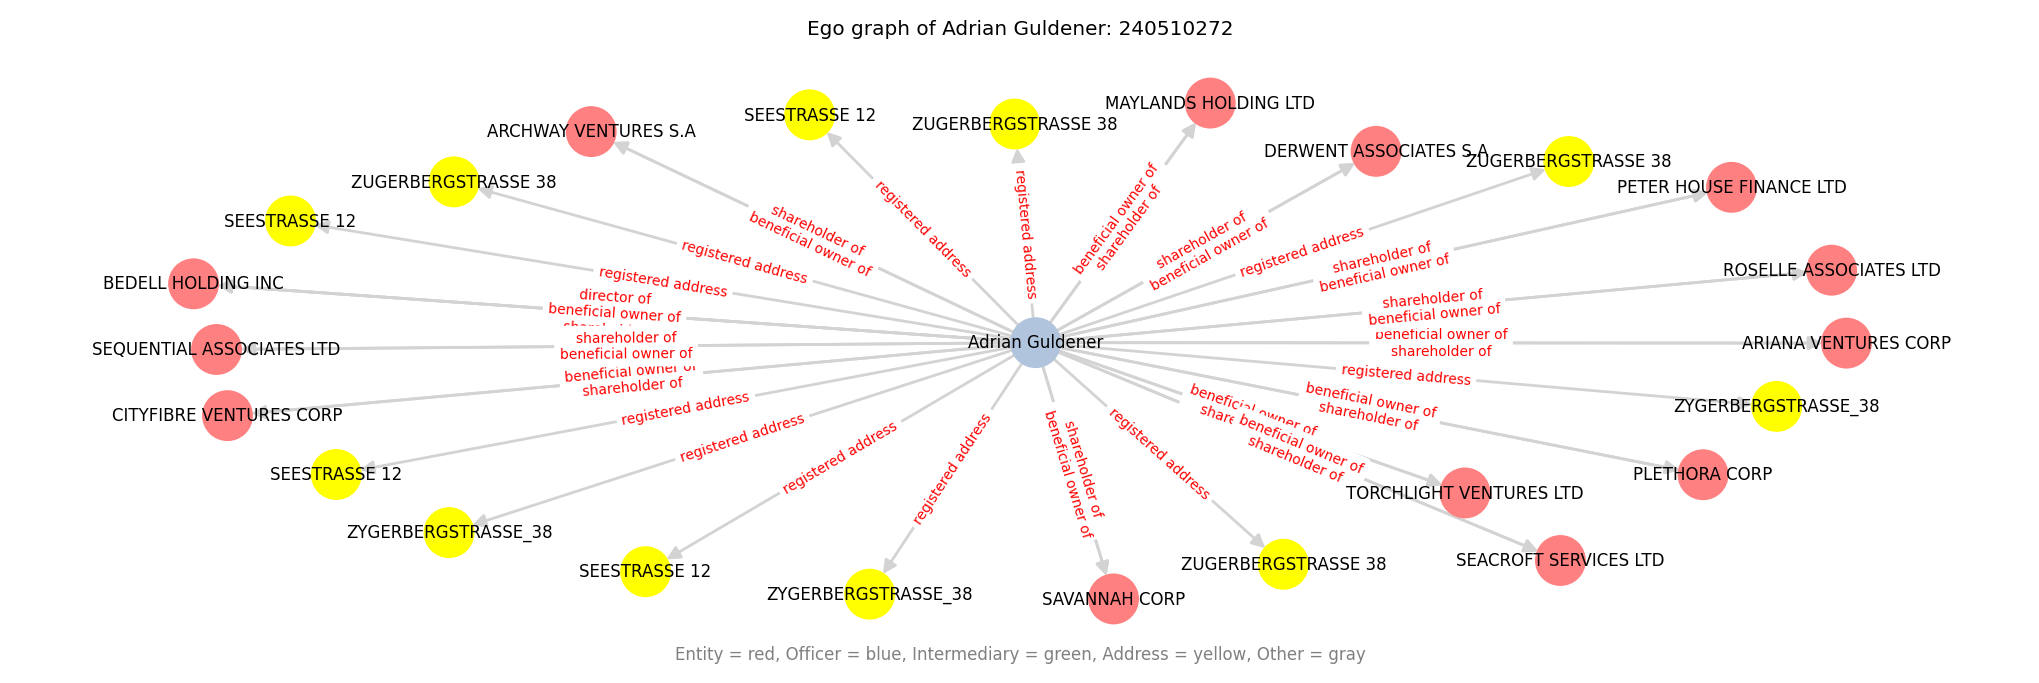

### Alexander Studhalter Ego Graph

Alexander Studhalter hat einen Entity Out-Degree von 15. Alexander Studhalter ist ein Anwalt und Notar aus Zug. Er ist vorallem bei vielen Offshore Firmen als "beneficial owner" eingetragen. [Sein Unternehmen "Studhalter International Group AG" handelt nach einigen Angaben rund 1,5 Mrd. CHF an Assets.](https://www.forbes.at/artikel/neue-moeglichkeiten.html) [Er wurde 2022 von der USA saktioniert, weil er mit der Tochter eines bereits sanktionierten Oligrachen gehandelt hat.](https://www.handelsblatt.com/unternehmen/mittelstand/familienunternehmer/alexander-studhalter-usa-setzen-erstmals-schweizer-staatsbuerger-auf-die-sanktionsliste/28810944.html)

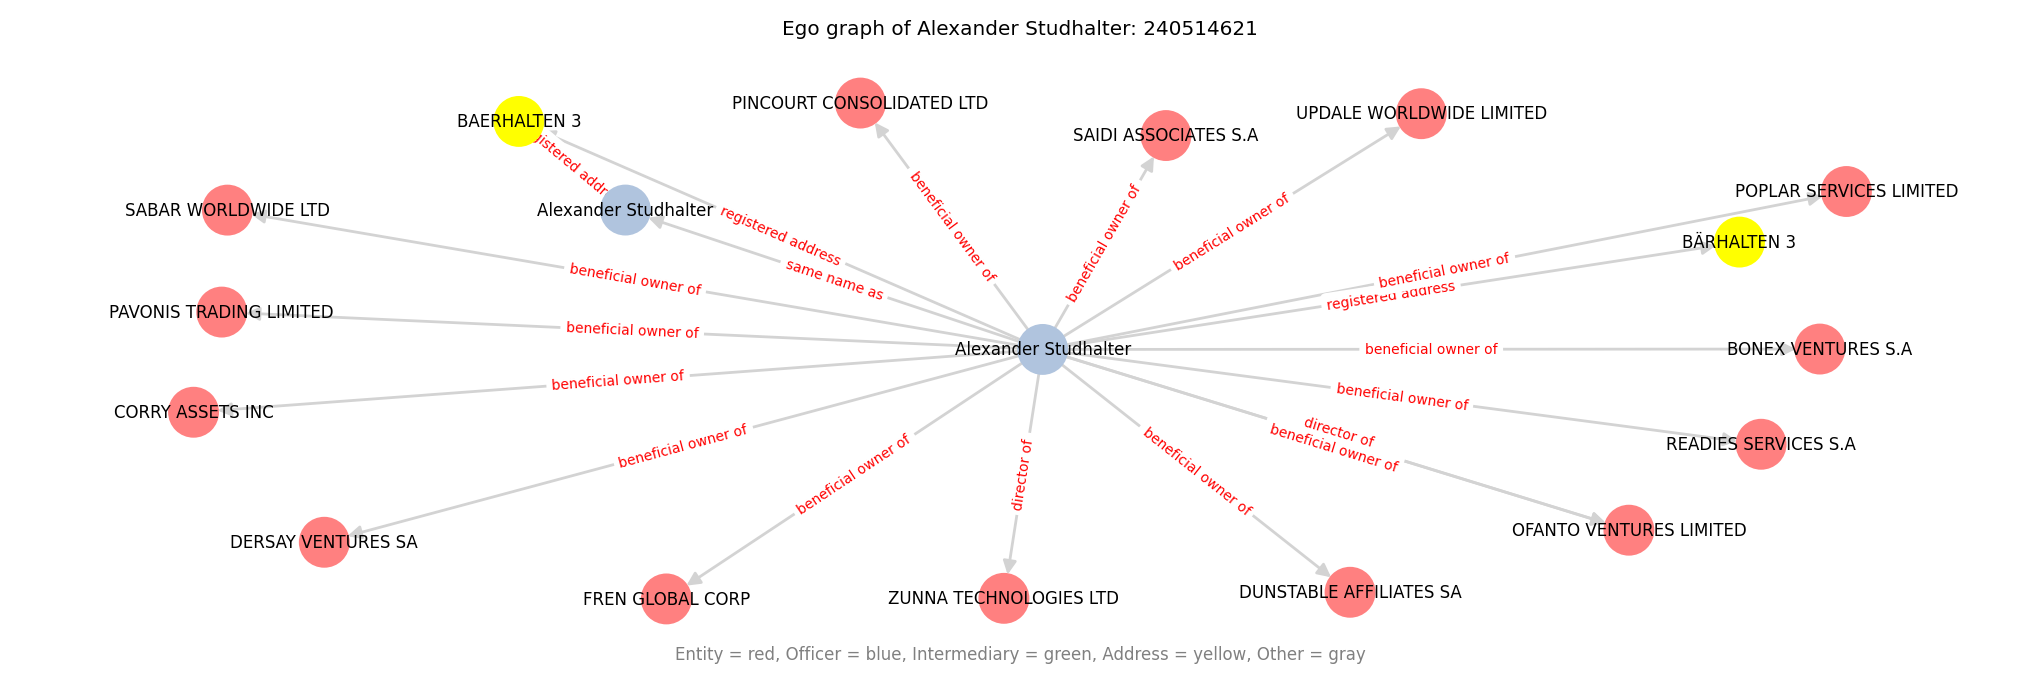

## 5. TODO: Tobi

## 6. TODO: Florin